In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/GeorgiaCh96/WESAD_raw_data/WESAD_raw_data.csv")

In [2]:
print(df)

             Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  pNN25  pNN50  ...  KURT_SQUARE  

In [3]:
df.head

<bound method NDFrame.head of              Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  pN

In [4]:
df.info

<bound method DataFrame.info of              Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  

In [5]:
df.columns[-10:]

Index(['KURT_SQUARE', 'HR_SQRT', 'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF',
       'HR_HF', 'HF_VLF', 'subject id', 'condition', 'SSSQ'],
      dtype='object')

In [6]:
# inspecting labels
print(df['condition'].unique())

# frequency
print(df['condition'].value_counts())

if 'label' in df.columns:
    print(df['label'].unique())
    print(df['label'].value_counts())


['baseline' 'amusement' 'meditation' 'stress']
condition
baseline      76440
meditation    51976
stress        43886
amusement     24676
Name: count, dtype: int64


In [ ]:
# findings: 4 classes/labels:
# 1) Baseline, 2) Amusement, 3) Meditation, 4) Stress

In [7]:
# mapping labels to class numbers
label_map = {
    'baseline': 0,
    'stress': 1,
    'amusement': 2,
    'meditation': 3
}
df['label'] = df['condition'].map(label_map)


In [9]:
# feature target split
# excluding any non-feature columns like time, subject_id, condition, label
X = df.drop(['Time', 'subject id', 'condition', 'label'], axis=1)
y = df['label']

In [11]:
# performing tts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [12]:
# checking for missing value
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])
missing_percentage = (df.isnull().sum().sum() / df.size) * 100
print(f"missing %: {missing_percentage:.4f}%")

Series([], dtype: int64)
missing %: 0.0000%


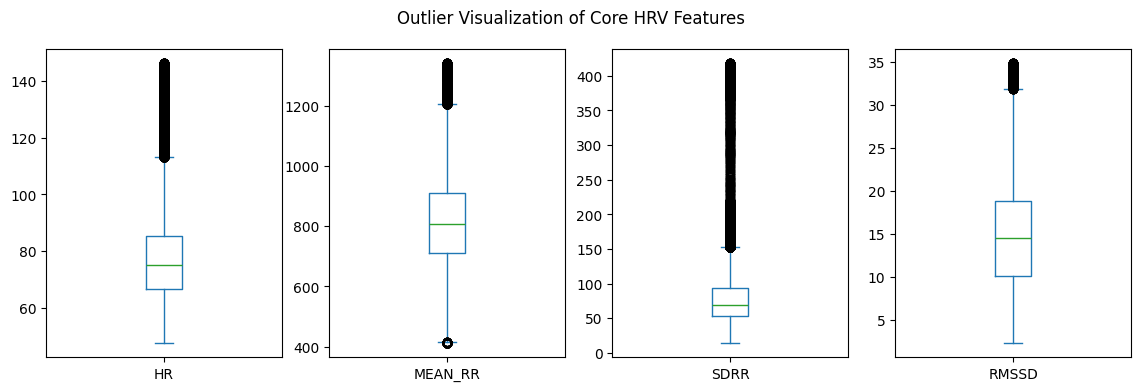

In [13]:
# detecting noise or outliers, 
# since biosignals (HR, GSR, EEG) are prone to spikes or drift noise, visualize distributions and signal trends
import matplotlib.pyplot as plt

features_to_plot = ['HR', 'MEAN_RR', 'SDRR', 'RMSSD'] 
df[features_to_plot].plot(kind='box', subplots=True, layout=(1,4), figsize=(14,4))
plt.suptitle("Outlier Visualization of Core HRV Features")
plt.show()

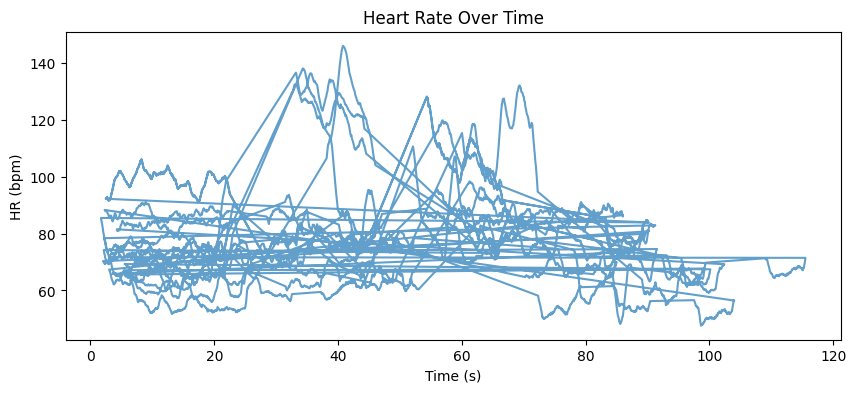

In [14]:
# time series trend (potential for outliers)
plt.figure(figsize=(10,4))
plt.plot(df['Time'], df['HR'], alpha=0.7)
plt.title("Heart Rate Over Time")
plt.xlabel("Time (s)")
plt.ylabel("HR (bpm)")
plt.show()

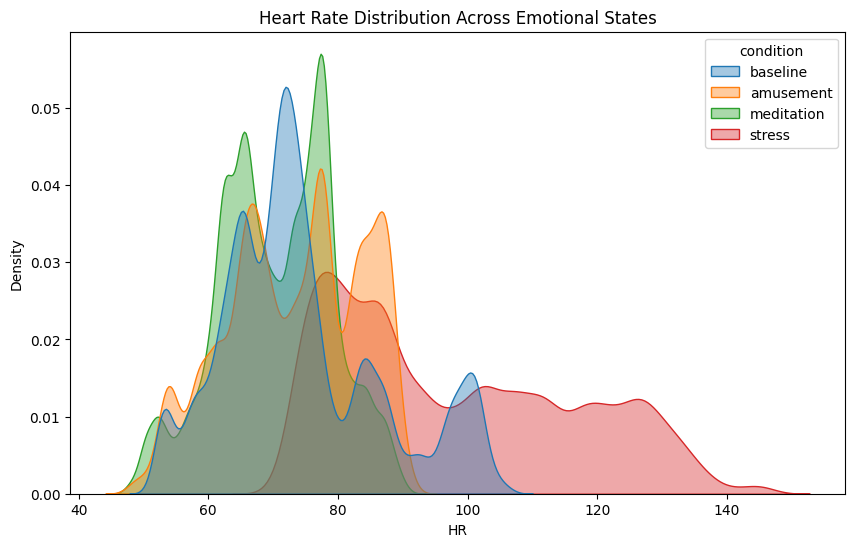

In [15]:
# feature distribution per condition
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='HR', hue='condition', fill=True, common_norm=False, alpha=0.4)
plt.title("Heart Rate Distribution Across Emotional States")
plt.show()

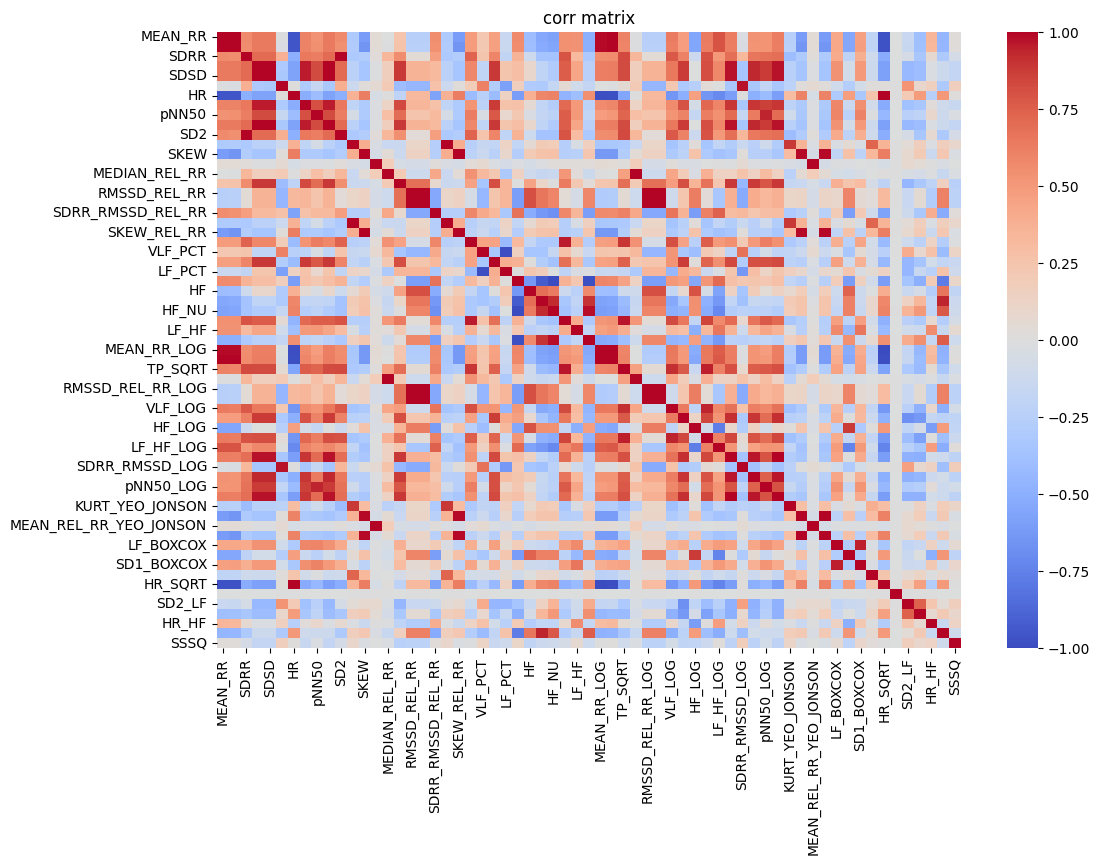

                         MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  \
MEAN_RR                      NaN   0.996010       NaN       NaN       NaN   
MEDIAN_RR               0.996010        NaN       NaN       NaN       NaN   
SDRR                         NaN        NaN       NaN       NaN       NaN   
RMSSD                        NaN        NaN       NaN       NaN  0.999999   
SDSD                         NaN        NaN       NaN  0.999999       NaN   
SDRR_RMSSD                   NaN        NaN       NaN       NaN       NaN   
HR                           NaN        NaN       NaN       NaN       NaN   
pNN25                        NaN        NaN       NaN  0.958459  0.958467   
pNN50                        NaN        NaN       NaN  0.824717  0.824694   
SD1                          NaN        NaN       NaN  0.999999       NaN   
SD2                          NaN        NaN  0.999981       NaN       NaN   
KURT                         NaN        NaN       NaN       NaN       NaN   

In [16]:
# studying corr matrix of highly correlated pairs only to avoid cluttering...
plt.figure(figsize=(12,8))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("corr matrix")
plt.show()
high_corr = corr[(corr > 0.8) & (corr < 1.0)]
print(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))